<a href="https://colab.research.google.com/github/nandini040601/Kaggle-Datasets/blob/main/Module_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Assignment

You've been asked to clean and explore a dataset containing employee ratings  for months of review cycles.

Enter your student id, in the next cell, when asked and then run the next two cells. The second cell will create the dataset you will be working on. If you run the second cell again, it will generate a new dataset so be aware.

PrepPy should work for the majority of this assignment if you want to try it out. There is a PrepPy Example notebook in our class repository Module 6 directory. Using PrepPy is not required.

https://github.com/gitmystuff/preppy

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, do not edit
import random

# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11722121
my_seed = random.seed(stud_id)


In [ ]:
# run this cell as is, do not edit
import pandas as pd
import numpy as np
import re
import random
import urllib.request
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))

words = []

# "https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/words.txt'

for word in urllib.request.urlopen(url):
    words.append(word.decode('utf-8').replace('\n', ''))

capitalized = [word for word in words if word[0].isupper()]
proper_names  = [word for word in capitalized if not word.isupper()]

variables = []
for n in range(20):
    variables.append(' '.join([proper_names[random.randint(0, len(proper_names))] for i in range(2)]))

print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['blue', 'white']) for i in range(100)]
df['Collar'] = cats
cats = [random.choice(['opt in', 'opt out']) for i in range(100)]
df['401K'] = cats
cats = [random.choice(['medical plan 1', 'medical plan 2', 'medical plan 3']) for i in range(100)]
df['Medical'] = cats
cats = [random.choice(['5 stars', '4 stars', '3 stars', '2 stars', '1 star']) for i in range(100)]
df['Stars'] = cats

df['Total Sales'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('Assgn 6.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['Barnet Nixon', 'Garibaldi Schoenberg', 'Sudanese Gibraltar', 'Pickering Guggenheim', 'Fibonacci Ireland', 'Gino Loren', 'Jr MacArthur', 'Frederic McCauley', 'Ben Taylor', 'Marcus Falstaff', 'Burmese Erickson', 'Bernardo Pergamon', 'Berlitz Hoosier', 'Lindbergh Johannesburg', 'Juno Andrea', 'Francine Dravidian', 'Manuel Dawson', 'Hutchins Christoph', 'Garry Cherokee', 'Kong Jakarta']


<ipython-input-8-880dc6c5bcc9>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Collar'] = cats
<ipython-input-8-880dc6c5bcc9>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['401K'] = cats
<ipython-input-8-880dc6c5bcc9>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

### Data Prep

In [ ]:
# create dataframe from Assgn 6.csv and print shape, info(), and head()
import pandas as pd
#Load the dataframe
df = pd.read_csv('Assgn 6.csv')
#print the shape of the dataset
print(df.shape)
#print information about the dataset
print(df.info())
#print the first five rows of the dataset
print(df.head())

(106, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jr MacArthur            106 non-null    float64
 1   Marcus Falstaff         106 non-null    float64
 2   Burmese Erickson        106 non-null    float64
 3   Manuel Dawson           106 non-null    float64
 4   Lindbergh Johannesburg  97 non-null     float64
 5   Sudanese Gibraltar      96 non-null     float64
 6   Gino Loren              106 non-null    float64
 7   Ben Taylor              106 non-null    float64
 8   Frederic McCauley       106 non-null    float64
 9   Berlitz Hoosier         106 non-null    float64
 10  Hutchins Christoph      106 non-null    int64  
 11  Fibonacci Ireland       96 non-null     float64
 12  Bernardo Pergamon       106 non-null    float64
 13  Pickering Guggenheim    103 non-null    float64
 14  Juno Andrea             104 non-

In [ ]:
# identify constants

constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Print the constant columns
print("Constant columns:", constant_columns)


Constant columns: ['Gino Loren', 'Pickering Guggenheim']


In [ ]:
# drop constants columns
df.drop(constant_columns, axis=1, inplace=True)

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
threshold = 0.95
# Identify quasi-constant columns
quasi_constant_columns = [
    col for col in df.columns if df[col].value_counts(normalize=True).iloc[0] >= threshold
]

# Print the quasi-constant columns
print("Quasi-constant columns:", quasi_constant_columns)

Quasi-constant columns: []


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
low_cardinality_threshold = 2
#quasi-constants with low cardinality
low_cardinality_columns = [
    col for col in df.columns if df[col].nunique() < low_cardinality_threshold or (df[col].value_counts(normalize = True).iloc[0] >= threshold)
]
#drop the identified columns with quasi-constants
df.drop(low_cardinality_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jr MacArthur            106 non-null    float64
 1   Marcus Falstaff         106 non-null    float64
 2   Burmese Erickson        106 non-null    float64
 3   Manuel Dawson           106 non-null    float64
 4   Lindbergh Johannesburg  97 non-null     float64
 5   Sudanese Gibraltar      96 non-null     float64
 6   Ben Taylor              106 non-null    float64
 7   Frederic McCauley       106 non-null    float64
 8   Berlitz Hoosier         106 non-null    float64
 9   Hutchins Christoph      106 non-null    int64  
 10  Fibonacci Ireland       96 non-null     float64
 11  Bernardo Pergamon       106 non-null    float64
 12  Juno Andrea             104 non-null    float64
 13  Kong Jakarta            106 non-null    int64  
 14  Collar                  106 non-null    ob

In [ ]:
# identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     Jr MacArthur  Marcus Falstaff  Burmese Erickson  Manuel Dawson  \
30       0.154757        -0.046419         -0.634796       0.442753   
37      -1.905069        -1.329054         -0.173684      -1.224038   
62       1.325721        -1.219565          0.470781      -0.790132   
83      -1.272380        -0.020579          0.034773       1.393562   
91      -0.234280        -1.381722          0.022084       1.019318   
105     -0.161152         0.967507          1.424928       1.164206   

     Lindbergh Johannesburg  Sudanese Gibraltar  Ben Taylor  \
30                 0.546518            0.681570    1.378343   
37                 0.529396            2.136033    1.500375   
62                 2.245276            0.838336   -1.314020   
83                 0.415063            0.467177   -0.075582   
91                 0.679481            0.628613   -3.064898   
105                     NaN            0.913289   -0.289711   

     Frederic McCauley  Berlitz Hoosier  Hutchins Christoph 

In [ ]:
# drop duplicate rows and print shape
dropped_duplicates = df.drop_duplicates()
print("Shape of the dataframe is ",dropped_duplicates.shape)


Shape of the dataframe is  (100, 19)


In [ ]:
# check of duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: []


In [ ]:
# drop duplicate features
dropped_duplicate_features = df.loc[:,~df.columns.duplicated()]
print("Shape of the dataframe is ",dropped_duplicate_features.shape)

Shape of the dataframe is  (106, 19)


### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use mean to replace missing data for features that look normal

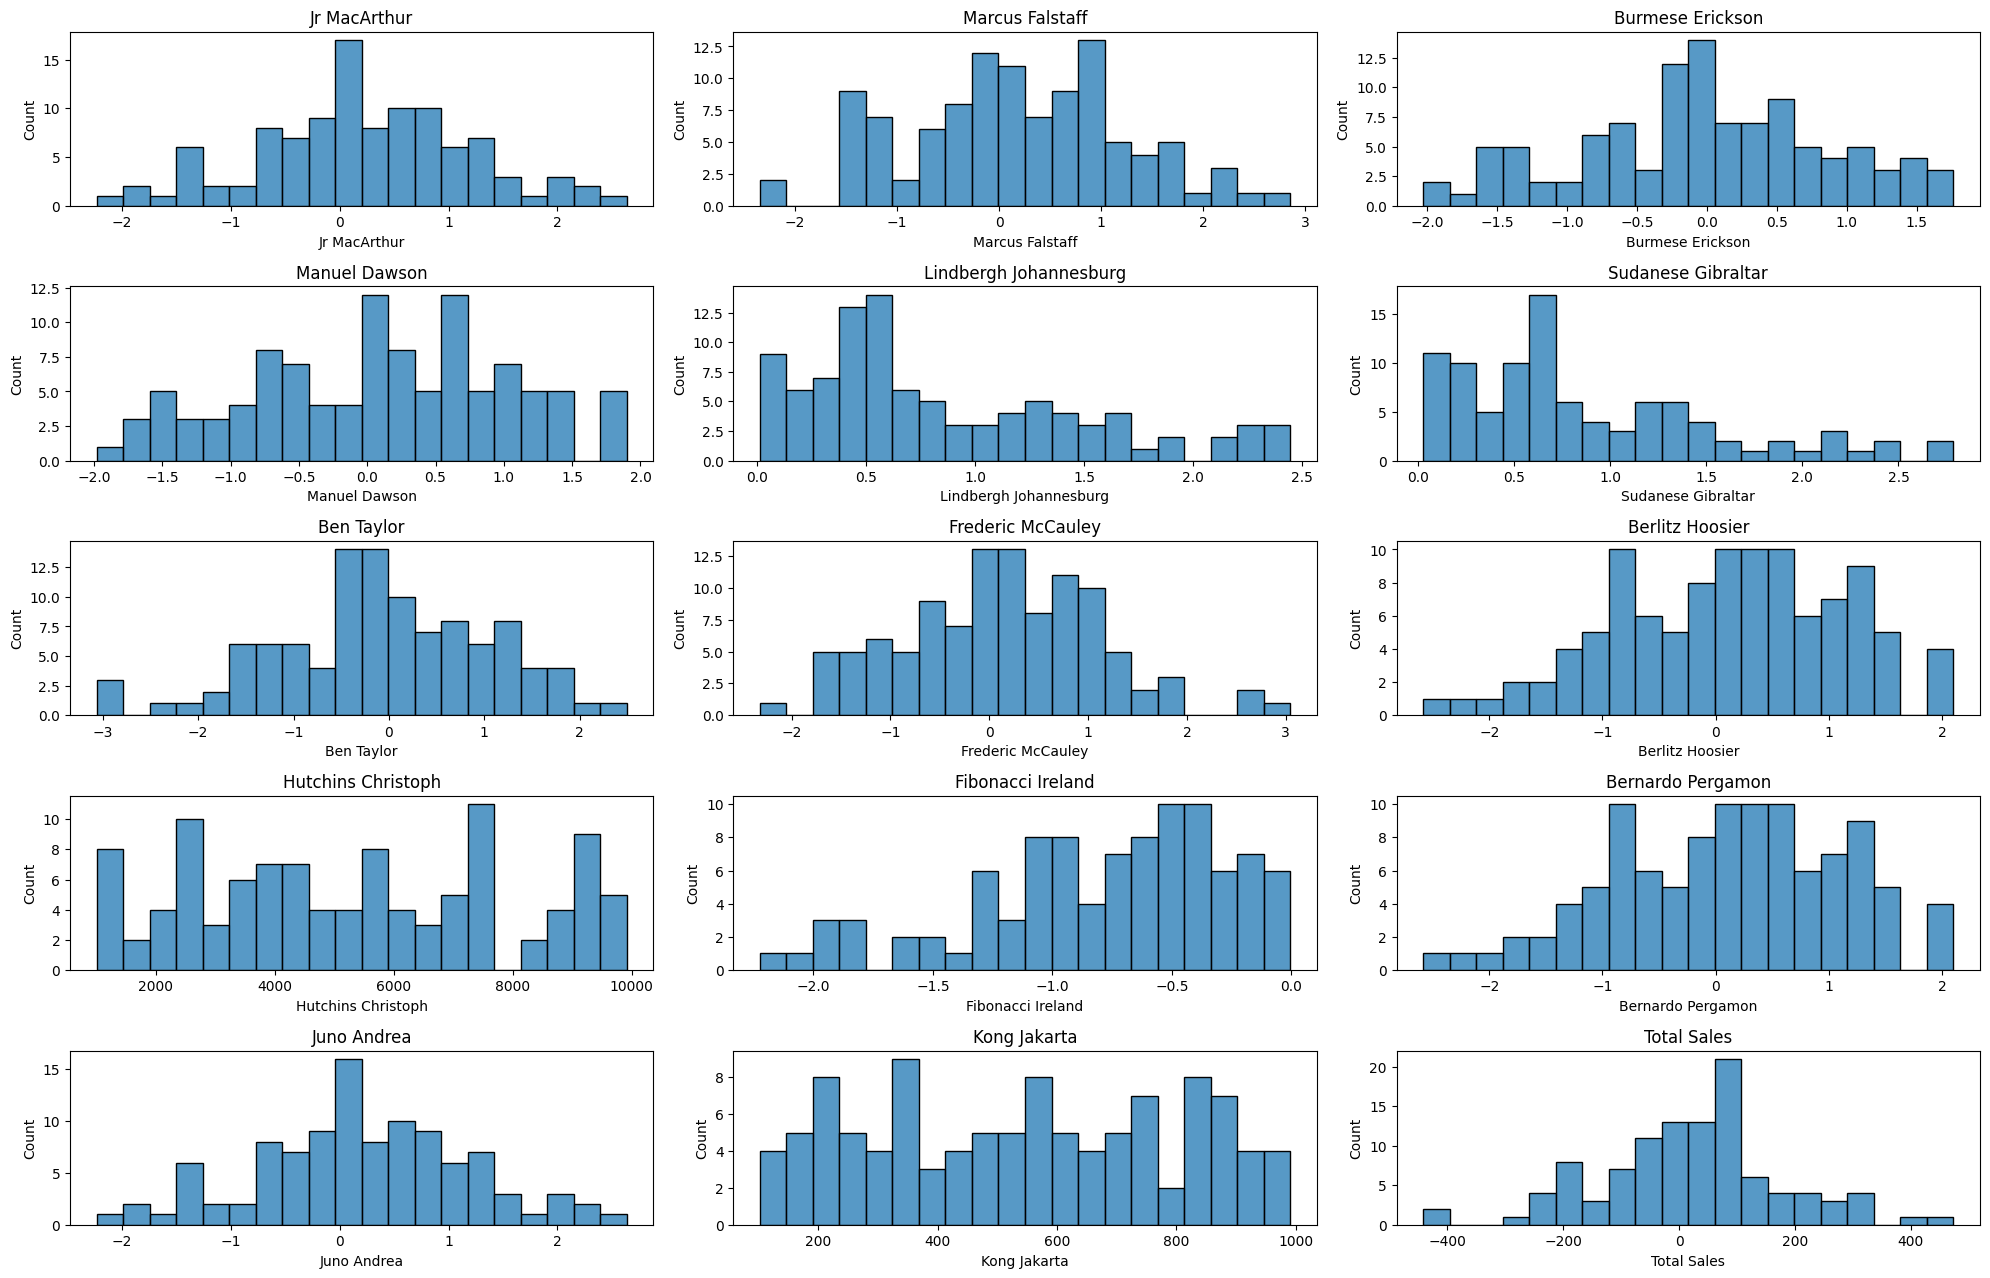

In [59]:
# plot histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Adjust rows and columns based on number of features
    sns.histplot(df[col], bins=20, kde=False)
    plt.title(col)

plt.tight_layout()
plt.show()


In [62]:
# show null values for each variable

null_values = dropped_duplicate_features.isnull().sum()
null_values_percentage = (null_values / len(dropped_duplicate_features)) * 100

# Create a DataFrame to display null values and their percentage
null_summary = pd.DataFrame({
    'Null Count': null_values,
    'Percentage': null_values_percentage
})

# Display the null values summary
null_summary


,Null Count,Percentage
Jr MacArthur,0,0.000000
Marcus Falstaff,0,0.000000
Burmese Erickson,0,0.000000
Manuel Dawson,0,0.000000
Lindbergh Johannesburg,9,8.490566
Sudanese Gibraltar,10,9.433962
Ben Taylor,0,0.000000
Frederic McCauley,0,0.000000
Berlitz Hoosier,0,0.000000
Hutchins Christoph,0,0.000000


In [63]:
# print info to recall which variables are numeric vs categorical
numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numeric Variables:", numeric_vars)
print("Categorical Variables:", categorical_vars)

Numeric Variables: ['Jr MacArthur', 'Marcus Falstaff', 'Burmese Erickson', 'Manuel Dawson', 'Lindbergh Johannesburg', 'Sudanese Gibraltar', 'Ben Taylor', 'Frederic McCauley', 'Berlitz Hoosier', 'Hutchins Christoph', 'Fibonacci Ireland', 'Bernardo Pergamon', 'Juno Andrea', 'Kong Jakarta', 'Total Sales']
Categorical Variables: ['Collar', '401K', 'Medical', 'Stars']


In [65]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.01-Interpolation-Problem-Statement.html
# https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/
for col in numeric_vars:
    if dropped_duplicate_features[col].isnull().sum() > 0:
        if dropped_duplicate_features[col].skew() > 1 or dropped_duplicate_features[col].skew() < -1:
            # If skewed, use median
            median_value = dropped_duplicate_features[col].median()
            dropped_duplicate_features[col].fillna(median_value, inplace=True)
        else:
            # If normal, use mean
            mean_value = dropped_duplicate_features[col].mean()
            dropped_duplicate_features[col].fillna(mean_value, inplace=True)

for col in categorical_vars:
    if dropped_duplicate_features[col].isnull().sum() > 0:
        # Use mode for categorical columns
        mode_value = dropped_duplicate_features[col].mode()[0]
        dropped_duplicate_features[col].fillna(mode_value, inplace=True)

# Step 3: Confirm changes
missing_values_summary = dropped_duplicate_features.isnull().sum()
print(missing_values_summary[missing_values_summary > 0])


Series([], dtype: int64)


<ipython-input-65-83cc33ddbeae>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dropped_duplicate_features[col].fillna(mean_value, inplace=True)
<ipython-input-65-83cc33ddbeae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [67]:
# describe df
dropped_duplicate_features.describe(include = "all")

,Jr MacArthur,Marcus Falstaff,Burmese Erickson,Manuel Dawson,Lindbergh Johannesburg,Sudanese Gibraltar,Ben Taylor,Frederic McCauley,Berlitz Hoosier,Hutchins Christoph,Fibonacci Ireland,Bernardo Pergamon,Juno Andrea,Kong Jakarta,Collar,401K,Medical,Stars,Total Sales
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106,106,106,106,106.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,3,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,opt out,medical plan 2,2 stars,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,53,37,31,NaN
mean,0.219180,0.186036,-0.022540,0.091080,0.857210,0.855614,-0.076486,0.124105,0.102489,5334.198113,-0.788656,0.102489,0.214789,540.650943,NaN,NaN,NaN,NaN,20.768234
std,0.969670,1.057451,0.880629,0.933867,0.612279,0.634563,1.128311,1.024668,1.003664,2609.285990,0.503882,1.003664,0.968204,256.822935,NaN,NaN,NaN,NaN,159.009715
min,-2.232218,-2.346149,-2.027652,-1.981459,0.012000,0.026703,-3.064898,-2.321518,-2.584900,1003.000000,-2.224119,-2.584900,-2.232218,102.000000,NaN,NaN,NaN,NaN,-441.616282
25%,-0.300873,-0.507631,-0.623470,-0.651580,0.415063,0.459169,-0.636148,-0.526387,-0.705000,3220.250000,-1.024157,-0.705000,-0.300873,328.750000,NaN,NaN,NaN,NaN,-71.929692
50%,0.153645,0.108427,0.011869,0.145481,0.687837,0.667172,-0.105577,0.120599,0.136300,5118.000000,-0.758210,0.136300,0.154757,549.500000,NaN,NaN,NaN,NaN,36.298050
75%,0.837372,0.950398,0.567918,0.754709,1.225306,1.198784,0.790446,0.829586,0.866150,7496.000000,-0.423507,0.866150,0.837372,765.250000,NaN,NaN,NaN,NaN,98.952220


In [73]:
# standardize feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(dropped_duplicate_features[numeric_vars])
scaled = pd.DataFrame(scaled, columns=numeric_vars)

In [74]:
# normalize features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled[numeric_vars] = scaler.fit_transform(scaled[numeric_vars])

In [75]:
# describe data again to verify transformations
scaled.describe(include='all')

,Jr MacArthur,Marcus Falstaff,Burmese Erickson,Manuel Dawson,Lindbergh Johannesburg,Sudanese Gibraltar,Ben Taylor,Frederic McCauley,Berlitz Hoosier,Hutchins Christoph,Fibonacci Ireland,Bernardo Pergamon,Juno Andrea,Kong Jakarta,Total Sales
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.503413,0.486984,0.528794,0.533886,0.347463,0.300361,0.537555,0.455703,0.573334,0.485669,0.646719,0.573334,0.502511,0.493421,0.505274
std,0.199129,0.203367,0.232242,0.240564,0.251706,0.229937,0.202960,0.190931,0.214124,0.292586,0.227014,0.214124,0.198828,0.288890,0.173759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396616,0.353580,0.370315,0.342577,0.165698,0.156707,0.436883,0.334494,0.401062,0.248626,0.540619,0.401062,0.396616,0.255062,0.403978
50%,0.489955,0.472059,0.537868,0.547900,0.277835,0.232077,0.532322,0.455050,0.580547,0.461426,0.660436,0.580547,0.490183,0.503375,0.522244
75%,0.630363,0.633985,0.684511,0.704837,0.498787,0.424710,0.693498,0.587158,0.736255,0.728078,0.811230,0.736255,0.630363,0.746063,0.590710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# df.info()
scaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jr MacArthur            106 non-null    float64
 1   Marcus Falstaff         106 non-null    float64
 2   Burmese Erickson        106 non-null    float64
 3   Manuel Dawson           106 non-null    float64
 4   Lindbergh Johannesburg  106 non-null    float64
 5   Sudanese Gibraltar      106 non-null    float64
 6   Ben Taylor              106 non-null    float64
 7   Frederic McCauley       106 non-null    float64
 8   Berlitz Hoosier         106 non-null    float64
 9   Hutchins Christoph      106 non-null    float64
 10  Fibonacci Ireland       106 non-null    float64
 11  Bernardo Pergamon       106 non-null    float64
 12  Juno Andrea             106 non-null    float64
 13  Kong Jakarta            106 non-null    float64
 14  Total Sales             106 non-null    fl

    Jr MacArthur  Marcus Falstaff  Burmese Erickson  Manuel Dawson  \
3       0.891182         0.720742          0.463203       0.138411   
10      0.468730         0.454632          0.560217       0.577016   
13      0.759649         0.433514          0.747368       0.451443   
14      0.908326         0.745023          0.492883       0.735258   
18      0.625582         0.476984          0.712675       0.772122   
28      0.383251         0.500870          0.562722       0.401062   
29      0.410292         0.185476          0.540562       0.773000   
32      0.447213         0.625811          0.583350       0.714352   
41      0.199934         0.626972          0.622335       0.443125   
42      0.562891         0.352862          0.119487       0.358716   
44      0.390336         0.493995          0.815322       0.834316   
69      0.486674         0.316046          0.589621       0.728202   
70      0.000000         0.601090          0.544825       0.077177   
72      0.595767    

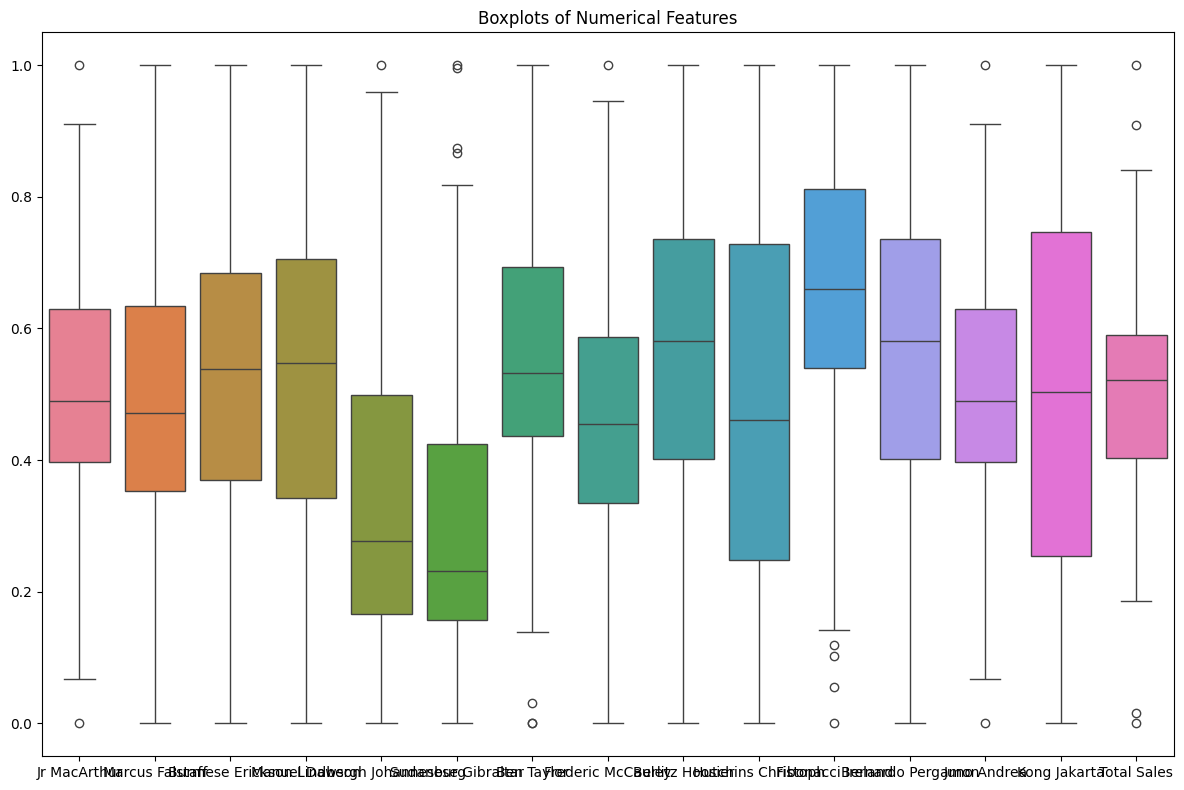

In [79]:
# check for outliers
Q1 = scaled.quantile(0.25)
Q3 = scaled.quantile(0.75)
IQR = Q3 - Q1

outlier_test = ((scaled < (Q1 - 1.5 * IQR)) | (scaled > (Q3 + 1.5 * IQR))).any(axis=1)
outliers = scaled[outlier_test]
print(outliers)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data= scaled[numeric_vars])
plt.title("Boxplots of Numerical Features")

plt.tight_layout()
plt.show()


In [84]:
# vif test
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Step 3: Calculate VIF for each numerical column
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_vars
vif_data['VIF'] = [variance_inflation_factor(scaled.values, i) for i in range(scaled.shape[1])]

# Print the VIF values
print(vif_data)


                   Feature          VIF
0             Jr MacArthur  2687.078748
1          Marcus Falstaff     6.624284
2         Burmese Erickson     5.941017
3            Manuel Dawson     8.118360
4   Lindbergh Johannesburg     3.604611
5       Sudanese Gibraltar     2.795049
6               Ben Taylor     9.056835
7        Frederic McCauley    10.462015
8          Berlitz Hoosier          inf
9       Hutchins Christoph     3.982204
10       Fibonacci Ireland     8.201653
11       Bernardo Pergamon          inf
12             Juno Andrea  2717.023096
13            Kong Jakarta     4.152083
14             Total Sales    31.794057


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [87]:
# remove multicollinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Function to calculate VIF for the given dataframe
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

features_to_keep = list(numeric_vars)
threshold = 5  # Set VIF threshold (commonly 5 or 10)

while True:
    vif_data = calculate_vif(scaled, features_to_keep)
    max_vif = vif_data['VIF'].max()

    if max_vif > threshold:
        feature_to_remove = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
        print(f"Removing {feature_to_remove} with VIF = {max_vif}")
        features_to_keep.remove(feature_to_remove)
    else:
        break

# Final VIF DataFrame after removing multicollinearity
print("Final features after removing multicollinearity:")
final_vif_data = calculate_vif(scaled, features_to_keep)
print(final_vif_data)



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing Berlitz Hoosier with VIF = inf
Removing Juno Andrea with VIF = 2717.023095701185
Removing Total Sales with VIF = 31.372525279128084
Removing Ben Taylor with VIF = 8.94278146078764
Removing Bernardo Pergamon with VIF = 7.599735776792536
Removing Fibonacci Ireland with VIF = 6.799690110662129
Removing Jr MacArthur with VIF = 6.1998673181863895
Removing Marcus Falstaff with VIF = 5.447832571908075
Removing Frederic McCauley with VIF = 5.2445432170557185
Removing Burmese Erickson with VIF = 5.019978445742261
Final features after removing multicollinearity:
                  Feature       VIF
0           Manuel Dawson  4.007802
1  Lindbergh Johannesburg  2.712582
2      Sudanese Gibraltar  2.230709
3      Hutchins Christoph  3.330650
4            Kong Jakarta  3.422286


In [88]:
# verify you no longer have multicollinearity
final_vif_data = calculate_vif(scaled, features_to_keep)

# Print the final VIF values
print("Final VIF values after removing multicollinearity:")
print(final_vif_data)

Final VIF values after removing multicollinearity:
                  Feature       VIF
0           Manuel Dawson  4.007802
1  Lindbergh Johannesburg  2.712582
2      Sudanese Gibraltar  2.230709
3      Hutchins Christoph  3.330650
4            Kong Jakarta  3.422286


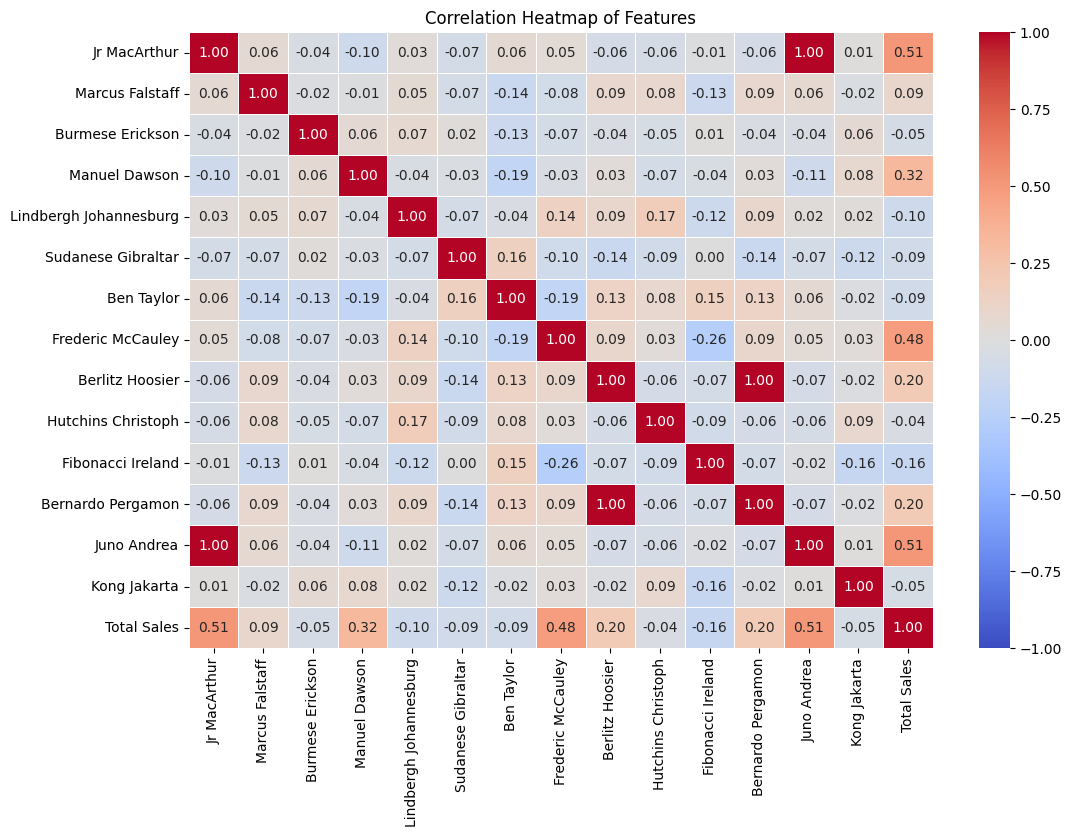

In [90]:
# show correlation heat map for features, check for multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
correlation_matrix = scaled.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [92]:
# correlation with target
target_column = 'Total Sales'

correlation_with_target = scaled.corr()[target_column].sort_values(ascending=False)

# Print the correlation with the target
print("Correlation of features with the target (Total Sales):")
print(correlation_with_target)

Correlation of features with the target (Total Sales):
Total Sales               1.000000
Juno Andrea               0.514893
Jr MacArthur              0.512334
Frederic McCauley         0.477231
Manuel Dawson             0.320795
Berlitz Hoosier           0.201908
Bernardo Pergamon         0.201908
Marcus Falstaff           0.090344
Hutchins Christoph       -0.037011
Kong Jakarta             -0.047883
Burmese Erickson         -0.054968
Ben Taylor               -0.089225
Sudanese Gibraltar       -0.090279
Lindbergh Johannesburg   -0.101666
Fibonacci Ireland        -0.156391
Name: Total Sales, dtype: float64


In [95]:
# print your dataframe info()
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jr MacArthur            106 non-null    float64
 1   Marcus Falstaff         106 non-null    float64
 2   Burmese Erickson        106 non-null    float64
 3   Manuel Dawson           106 non-null    float64
 4   Lindbergh Johannesburg  106 non-null    float64
 5   Sudanese Gibraltar      106 non-null    float64
 6   Ben Taylor              106 non-null    float64
 7   Frederic McCauley       106 non-null    float64
 8   Berlitz Hoosier         106 non-null    float64
 9   Hutchins Christoph      106 non-null    float64
 10  Fibonacci Ireland       106 non-null    float64
 11  Bernardo Pergamon       106 non-null    float64
 12  Juno Andrea             106 non-null    float64
 13  Kong Jakarta            106 non-null    float64
 14  Total Sales             106 non-null    fl

### Summary

The original dataset consisted of 106 rows and 21 features, including both numerical and categorical variables. To improve data quality, I eliminated constant and quasi-constant features, as well as duplicate rows and columns.

For missing values, I used the median to impute data for skewed features and the mean for normally distributed features. Additionally, I standardized and normalized the numerical features to ensure they were on a consistent scale.

To address multicollinearity, I used the VIF test to identify and remove features with high multicollinearity. I also created a correlation heatmap to confirm there were no significant correlations remaining.

After these cleaning steps, the dataset was reduced to 100 rows and 12 features, making it ready for further analysis and modeling.